#***Predictive Model For House Prices***

###**In This Task we Do EDA analysis on a house price dataset and get some insight from that dataset**

####**First , We install required libararies which used to make this model**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

####***Now its time to import Our CSV file for this Model***

In [2]:
url = 'https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction'

# Download the data from Kaggle
!kaggle datasets download -d harishkumardatalab/housing-price-prediction

!unzip housing-price-prediction.zip

Dataset URL: https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction
License(s): CC0-1.0
  0% 0.00/4.63k [00:00<?, ?B/s]
100% 4.63k/4.63k [00:00<00:00, 5.46MB/s]
Archive:  housing-price-prediction.zip
  inflating: Housing.csv             


In [3]:
df = pd.read_csv('Housing.csv')

#Print first 15 values from the CSv to check That is the CSV is Correct or Not
print(df.head(15))

       price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0   13300000   7420         4          2        3      yes        no       no   
1   12250000   8960         4          4        4      yes        no       no   
2   12250000   9960         3          2        2      yes        no      yes   
3   12215000   7500         4          2        2      yes        no      yes   
4   11410000   7420         4          1        2      yes       yes      yes   
5   10850000   7500         3          3        1      yes        no      yes   
6   10150000   8580         4          3        4      yes        no       no   
7   10150000  16200         5          3        2      yes        no       no   
8    9870000   8100         4          1        2      yes       yes      yes   
9    9800000   5750         3          2        4      yes       yes       no   
10   9800000  13200         3          1        2      yes        no      yes   
11   9681000   6000         

In [4]:
df = df.replace({'yes': 1, 'no': 0}).infer_objects(copy=False)

print(df.head(15))

       price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0   13300000   7420         4          2        3         1          0   
1   12250000   8960         4          4        4         1          0   
2   12250000   9960         3          2        2         1          0   
3   12215000   7500         4          2        2         1          0   
4   11410000   7420         4          1        2         1          1   
5   10850000   7500         3          3        1         1          0   
6   10150000   8580         4          3        4         1          0   
7   10150000  16200         5          3        2         1          0   
8    9870000   8100         4          1        2         1          1   
9    9800000   5750         3          2        4         1          1   
10   9800000  13200         3          1        2         1          0   
11   9681000   6000         4          3        2         1          1   
12   9310000   6550         4         

<ipython-input-4-73aff477a9af>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'yes': 1, 'no': 0}).infer_objects(copy=False)


#**EDA Analysis for this CSV**

####**Check that is there any missing values is in the CSV or not**

In [5]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


####***As we see that there is no missing values in this CSV file***

####***Summary Statistice for this CSv file***

In [6]:
#This is used to file the max ,min ,std,count, 75% etc, value from a CSv file or a Dataframe
print(df.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

         mainroad   guestroom    basement  hotwaterheating  airconditioning  \
count  545.000000  545.000000  545.000000       545.000000       545.000000   
mean     0.858716    0.177982    0.350459         0.045872         0.315596   
std      0.348635    0.382849    0.477552         0.209399         0.465180   
min      0.000000    0.000

####***Check the total non null values per column and Datatyle of each colum from the CSV file***

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    int64 
 12  furnishingstatus  545 non-null    object
dtypes: int64(12), object(1)
memory usage: 55.5+ KB
None


####***Correlation matrix of this CSV***

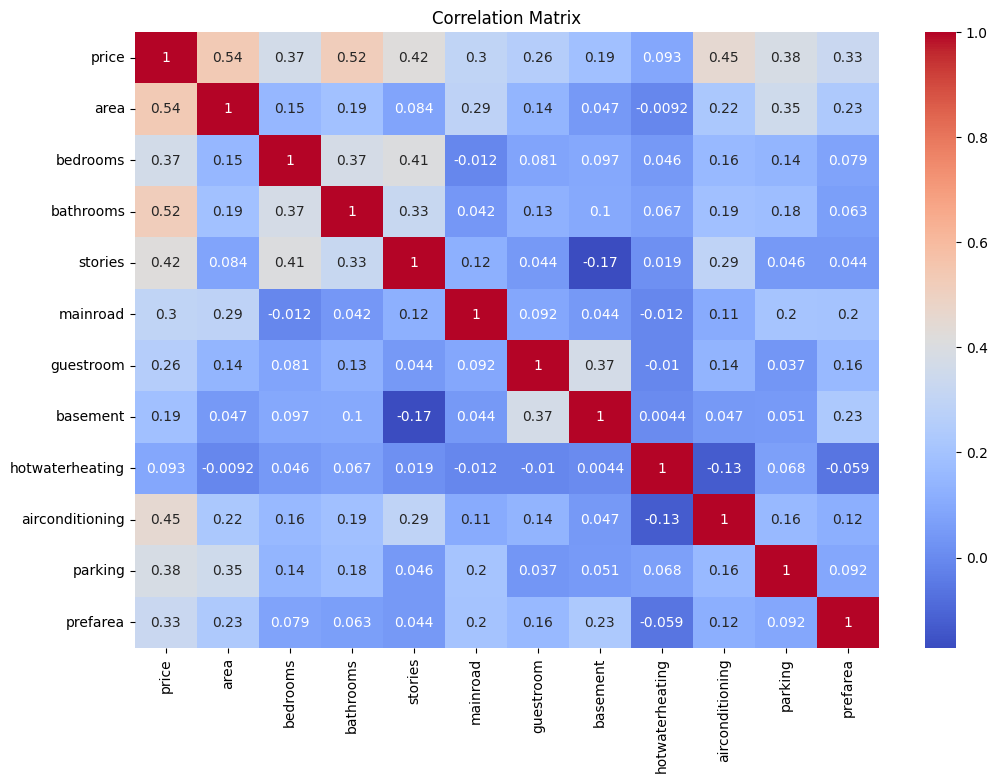

In [8]:
#First we remove the furnishingstatus column because we now that its a object type and heatmap only takes int type data
df1 = df.drop('furnishingstatus',axis=1)

#Now we make a heatmap of correlation between the columns
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

####***Now we make a pie chart of the furnishingstatus column***

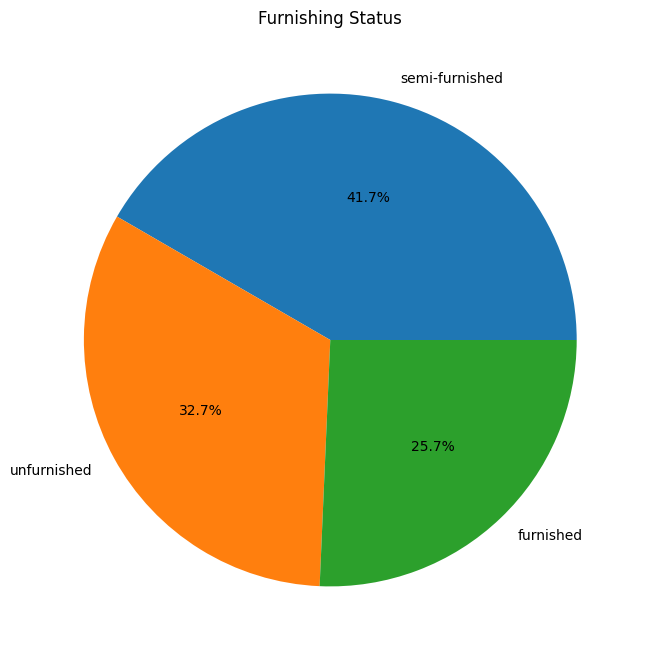

In [9]:
plt.figure(figsize=(12,8))
plt.pie(df['furnishingstatus'].value_counts(),labels=df['furnishingstatus'].value_counts().index,autopct='%1.1f%%')
plt.title('Furnishing Status')
plt.show()

####***Now we use pairplot to make all requied plot for this CSV***

In [ ]:
sns.pairplot(df)
plt.show()